#### Understanding Basic Statistics

# Chapter 4: Correlation and Regression


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os
from scipy import stats
from ubs_stats import *

PATH = '/home/mark/Documents/Class/Understanding Basic Statistics/Data/Chapter 4'

#### Section 4.1 _Scatter Diagrams and Linear Correlation_

---

### Sample Correlation Coefficient, r
numerical measurement that assesses the strength of a _linear_ relationship between two variables.

$$r = \frac{1}{n-1} \Sigma \left [ \frac{(x - \bar{x})}{s_x} \cdot \frac{(y - \bar{y})}{s_y} \right ]$$

`((x - x.mean()) / x.std() * (y - y.mean()) / y.std()).sum() / (x.size - 1)` <br>
`np.corrcoef(x,y)[0,1]` <br>

---

### Population Correlation Coefficient, $\rho$
numerical measurement that assesses the strength of a _linear_ relationship between two variables.



In [2]:
def calc_r(x, y):
    temp = [
        x - x.mean(),
        y - y.mean(),
        ((x - x.mean()) * (y - y.mean())),
        ((x - x.mean()) * (y - y.mean())).sum(),
        ((x - x.mean())/x.std() * (y - y.mean())/y.std()).sum(),
        ((x - x.mean())/x.std(ddof=1) * (y - y.mean())/y.std(ddof=1)).sum()/(x.size-1),
        x.std(ddof=1),
        ((x - x.mean())/x.std(ddof=0) * (y - y.mean())/y.std(ddof=0)).sum()/(x.size-0),
        x.std(ddof=0),
        np.corrcoef(x,y)[0,1],
    ]

    for t in temp:
        print(t, '\n')


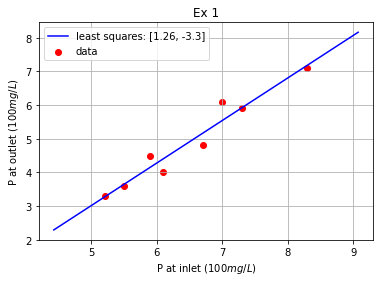

0   -1.3
1    0.8
2    0.2
3   -0.6
4   -0.4
5    1.8
6   -1.0
7    0.5
Name: x, dtype: float64 

0   -1.6125
1    0.9875
2   -0.1125
3   -0.4125
4   -0.9125
5    2.1875
6   -1.3125
7    1.1875
Name: y, dtype: float64 

0    2.09625
1    0.79000
2   -0.02250
3    0.24750
4    0.36500
5    3.93750
6    1.31250
7    0.59375
dtype: float64 

9.32 

6.790141350019924 

0.9700201928599892 

1.0267841614895092 

0.9700201928599891 

0.9604686356149273 

0.970020192859989 



In [3]:
# Ex 1
data = pd.read_excel(os.path.join(PATH, 'Ex0401.xls'))
x = data['x']
y = data['y']

b = np.polyfit(x, y, 1)
r = (x.max() - x.min()) * 0.25
tx = np.array([x.min() - r, x.max() + r])
ty = np.polyval(b, tx)
plt.plot(tx, ty, c='b', label=f'least squares: {[np.round(e, 2) for e in b]}')

plt.scatter(x,y, c='r', label='data')

plt.title(f'Ex 1')
plt.xlabel('P at inlet ($100mg/L$)')
plt.ylabel('P at outlet ($100mg/L$)')
plt.legend()
plt.grid()
plt.show()

calc_r(x, y)

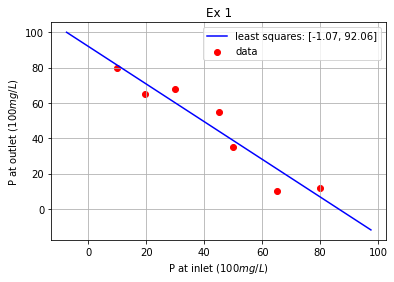

0   -32.785714
1   -23.285714
2   -12.785714
3     2.214286
4     7.214286
5    22.214286
6    37.214286
Name: x, dtype: float64 

0    33.571429
1    18.571429
2    21.571429
3     8.571429
4   -11.428571
5   -36.428571
6   -34.428571
Name: y, dtype: float64 

0   -1100.663265
1    -432.448980
2    -275.806122
3      18.979592
4     -82.448980
5    -809.234694
6   -1281.234694
dtype: float64 

-3962.857142857143 

-5.717762741019991 

-0.9529604568366651 

24.886169423425304 

-0.9529604568366649 

23.040115858552237 

-0.9529604568366653 



In [4]:
# Guided Ex 1
data = pd.read_excel(os.path.join(PATH, 'Table0401.xls'))
x = data['x']
y = data['y']

b = np.polyfit(x, y, 1)
r = (x.max() - x.min()) * 0.25
tx = np.array([x.min() - r, x.max() + r])
ty = np.polyval(b, tx)
plt.plot(tx, ty, c='b', label=f'least squares: {[np.round(e, 2) for e in b]}')

plt.scatter(x,y, c='r', label='data')

plt.title(f'Ex 1')
plt.xlabel('P at inlet ($100mg/L$)')
plt.ylabel('P at outlet ($100mg/L$)')
plt.legend()
plt.grid()
plt.show()

calc_r(x, y)

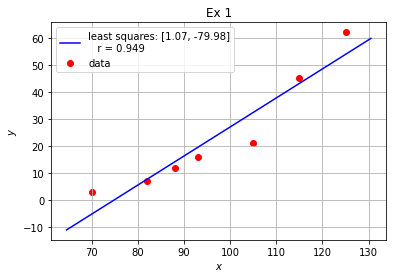

In [5]:
# Ex 2
data = pd.read_excel(os.path.join(PATH, 'Table0402.xls'))
x = data['x']
y = data['y']

b = np.polyfit(x, y, 1)
s = (x.max() - x.min()) * 0.1
tx = np.array([x.min() - s, x.max() + s])
ty = np.polyval(b, tx)
r = np.corrcoef(x,y)[0,1]
plt.plot(tx, ty, c='b', label=f'least squares: {[np.round(e, 2) for e in b]}\n   r = {r:.3f}')

plt.scatter(x,y, c='r', label='data')

plt.title(f'Ex 1')
plt.xlabel('$x$')
plt.ylabel('$y$')
plt.legend()
plt.grid()
plt.show()


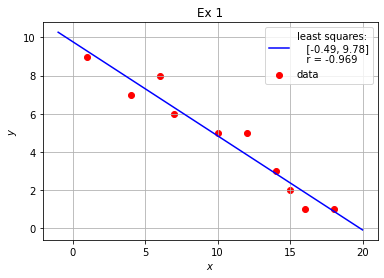

In [6]:
# Guided Ex 3
data = pd.read_excel(os.path.join(PATH, 'Table0404.xls'))
x = data['x']
y = data['y']

b = np.polyfit(x, y, 1)
s = np.round((x.max() - x.min()) * 0.1)
tx = np.array([x.min() - s, x.max() + s]).astype(int)
ty = np.polyval(b, tx)
r = np.corrcoef(x,y)[0,1]
plt.plot(tx, ty, c='b', label=f'least squares:\n   {[np.round(e, 2) for e in b]}\n   r = {r:.3f}')

plt.scatter(x,y, c='r', label='data')

plt.title(f'Ex 1')
plt.xlabel('$x$')
plt.ylabel('$y$')
plt.legend()
plt.grid()
plt.show()


### Section 4.1 Problems

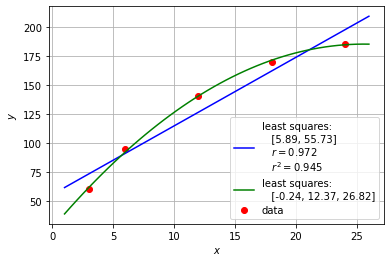

In [7]:
# Sec 4.1 Problem 13
data = pd.read_excel(os.path.join(PATH, 'Prob0401_13.xls'))
x = data['x']
y = data['y']

b = np.polyfit(x, y, 1)
s = np.round((x.max() - x.min()) * 0.1)
tx = np.array([x.min() - s, x.max() + s]).astype(int)
ty = np.polyval(b, tx)
r = np.corrcoef(x,y)[0,1]
label = f'least squares:\n   {[np.round(e, 2) for e in b]}' + \
        f'\n   $r = {r:.3f}$\n   $r^2 = {r**2:.3f}$'
plt.plot(tx, ty, c='b', label=label)

b2 = np.polyfit(x, y, 2)
tx2 = np.linspace(x.min() - s, x.max() + s)
ty2 = np.polyval(b2, tx2)
# r2 = np.corrcoef(x,y)[0,1]
label = f'least squares:\n   {[np.round(e, 2) for e in b2]}'
plt.plot(tx2, ty2, c='g', label=label)

plt.scatter(x,y, c='r', label='data')

# plt.title(f'Ex 1')
plt.xlabel('$x$')
plt.ylabel('$y$')
plt.legend()
plt.grid()
plt.show()

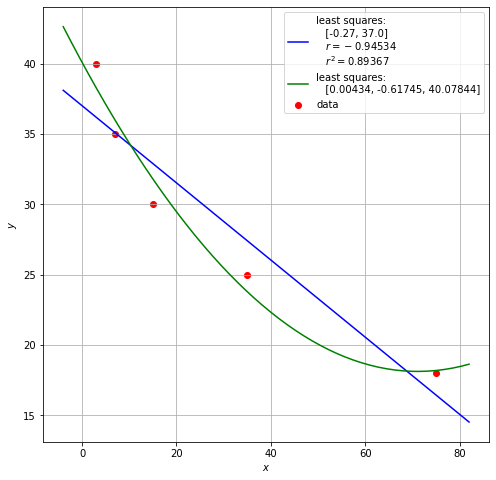

In [8]:
# Sec 4.1 Problem 14
data = pd.read_excel(os.path.join(PATH, 'Prob0401_14.xls'))
x = data['x']
y = data['y']

b = np.polyfit(x, y, 1)
s = np.round((x.max() - x.min()) * 0.1)
tx = np.array([x.min() - s, x.max() + s]).astype(int)
ty = np.polyval(b, tx)
r = np.corrcoef(x,y)[0,1]
plt.figure(figsize=(8,8)) 
label = f'least squares:\n   {[np.round(e, 2) for e in b]}' + \
        f'\n   $r = {r:.5f}$\n   $r^2 = {r**2:.5f}$'
plt.plot(tx, ty, c='b', label=label)

b2 = np.polyfit(x, y, 2)
tx2 = np.linspace(x.min() - s, x.max() + s)
ty2 = np.polyval(b2, tx2)
label = f'least squares:\n   {[np.round(e, 5) for e in b2]}'
plt.plot(tx2, ty2, c='g', label=label)

plt.scatter(x,y, c='r', label='data')

# plt.title(f'Ex 1')
plt.xlabel('$x$')
plt.ylabel('$y$')
plt.legend()
plt.grid()
plt.show()

In [9]:
stats.pearsonr(x, y)

(-0.9453392090982914, 0.015214388542573136)

In [10]:
stats.spearmanr(x, y)

SpearmanrResult(correlation=-0.9999999999999999, pvalue=1.4042654220543672e-24)

In [11]:
stats.linregress([x, y])

LinregressResult(slope=-0.27408256880733944, intercept=37.00022935779817, rvalue=-0.9453392090982913, pvalue=0.015214388542573173, stderr=0.05458442544503263)

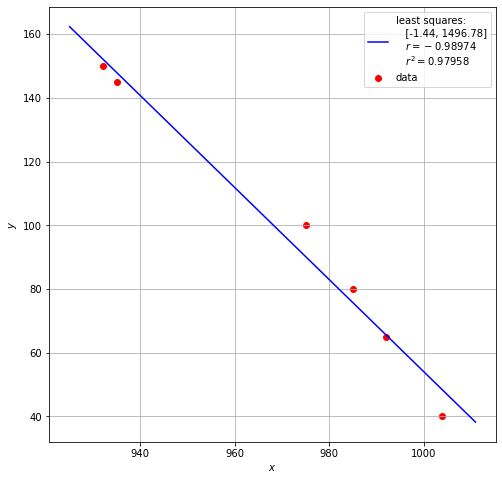

In [12]:
# Sec 4.1 Problem 15
data = pd.read_excel(os.path.join(PATH, 'Prob0401_15.xls'))
x = data['x']
y = data['y']

b = np.polyfit(x, y, 1)
s = np.round((x.max() - x.min()) * 0.1)
tx = np.array([x.min() - s, x.max() + s]).astype(int)
ty = np.polyval(b, tx)
r = np.corrcoef(x,y)[0,1]
plt.figure(figsize=(8,8)) 
label = f'least squares:\n   {[np.round(e, 2) for e in b]}' + \
        f'\n   $r = {r:.5f}$\n   $r^2 = {r**2:.5f}$'
plt.plot(tx, ty, c='b', label=label)

# b2 = np.polyfit(x, y, 2)
# tx2 = np.linspace(x.min() - s, x.max() + s)
# ty2 = np.polyval(b2, tx2)
# label = f'least squares:\n   {[np.round(e, 5) for e in b2]}'
# plt.plot(tx2, ty2, c='g', label=label)

plt.scatter(x,y, c='r', label='data')

# plt.title(f'Ex 1')
plt.xlabel('$x$')
plt.ylabel('$y$')
plt.legend()
plt.grid()
plt.show()

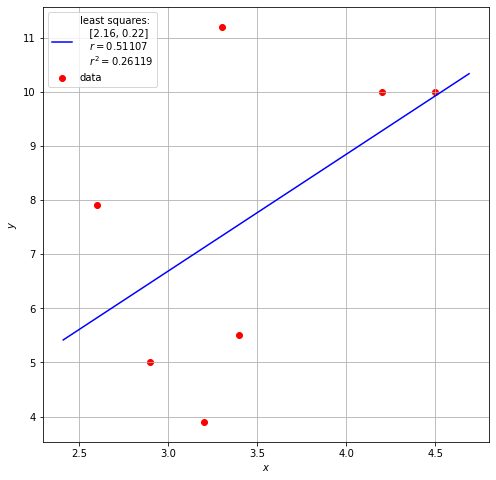

In [13]:
# Sec 4.1 Problem 16
data = pd.read_excel(os.path.join(PATH, 'Prob0401_16.xls'))
x = data['x']
y = data['y']

b = np.polyfit(x, y, 1)
s = (x.max() - x.min()) * 0.1
tx = np.array([x.min() - s, x.max() + s])
ty = np.polyval(b, tx)
r = np.corrcoef(x,y)[0,1]
plt.figure(figsize=(8,8)) 
label = f'least squares:\n   {[np.round(e, 2) for e in b]}' + \
        f'\n   $r = {r:.5f}$\n   $r^2 = {r**2:.5f}$'
plt.plot(tx, ty, c='b', label=label)

# b2 = np.polyfit(x, y, 2)
# tx2 = np.linspace(x.min() - s, x.max() + s)
# ty2 = np.polyval(b2, tx2)
# label = f'least squares:\n   {[np.round(e, 5) for e in b2]}'
# plt.plot(tx2, ty2, c='g', label=label)

plt.scatter(x, y, c='r', label='data')

# plt.title(f'Ex 1')
plt.xlabel('$x$')
plt.ylabel('$y$')
plt.legend()
plt.grid()
plt.show()

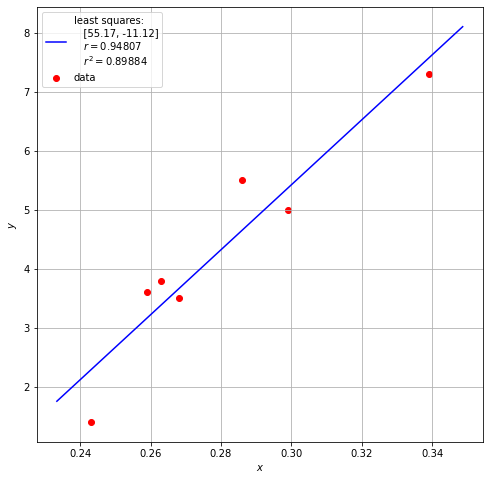

In [14]:
# Sec 4.1 Problem 17
data = pd.read_excel(os.path.join(PATH, 'Prob0401_17.xls'))
x = data['x']
y = data['y']

b = np.polyfit(x, y, 1)
s = (x.max() - x.min()) * 0.1
tx = np.array([x.min() - s, x.max() + s])
ty = np.polyval(b, tx)
r = np.corrcoef(x,y)[0,1]
plt.figure(figsize=(8,8)) 
label = f'least squares:\n   {[np.round(e, 2) for e in b]}' + \
        f'\n   $r = {r:.5f}$\n   $r^2 = {r**2:.5f}$'
plt.plot(tx, ty, c='b', label=label)

# b2 = np.polyfit(x, y, 2)
# tx2 = np.linspace(x.min() - s, x.max() + s)
# ty2 = np.polyval(b2, tx2)
# label = f'least squares:\n   {[np.round(e, 5) for e in b2]}'
# plt.plot(tx2, ty2, c='g', label=label)

plt.scatter(x, y, c='r', label='data')

# plt.title(f'Ex 1')
plt.xlabel('$x$')
plt.ylabel('$y$')
plt.legend()
plt.grid()
plt.show()

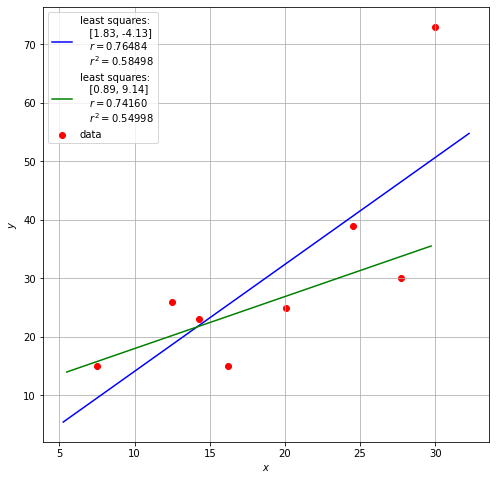

In [15]:
# Sec 4.1 Problem 18
data = pd.read_excel(os.path.join(PATH, 'Prob0401_18.xls'))
x = data['x']
y = data['y']
data1 = data[data['x'] < 30]
x1 = data1['x']
y1 = data1['y']

plt.figure(figsize=(8,8)) 

plt.scatter(x, y, c='r', label='data')

b = np.polyfit(x, y, 1)
s = (x.max() - x.min()) * 0.1
tx = np.array([x.min() - s, x.max() + s])
ty = np.polyval(b, tx)
r = stats.pearsonr(x, y)[0]
label = f'least squares:\n   {[np.round(e, 2) for e in b]}' + \
        f'\n   $r = {r:.5f}$\n   $r^2 = {r**2:.5f}$'
plt.plot(tx, ty, c='b', label=label)

b1 = np.polyfit(x1, y1, 1)
s = (x1.max() - x1.min()) * 0.1
tx1 = np.array([x1.min() - s, x1.max() + s])
ty1 = np.polyval(b1, tx1)
r1 = stats.pearsonr(x1, y1)[0]
label = f'least squares:\n   {[np.round(e, 2) for e in b1]}' + \
        f'\n   $r = {r1:.5f}$\n   $r^2 = {r1**2:.5f}$'
plt.plot(tx1, ty1, c='g', label=label)

# b2 = np.polyfit(x, y, 2)
# tx2 = np.linspace(x.min() - s, x.max() + s)
# ty2 = np.polyval(b2, tx2)
# label = f'least squares:\n   {[np.round(e, 5) for e in b2]}'
# plt.plot(tx2, ty2, c='g', label=label)

# plt.title(f'Ex 1')
plt.xlabel('$x$')
plt.ylabel('$y$')
plt.legend()
plt.grid()
plt.show()

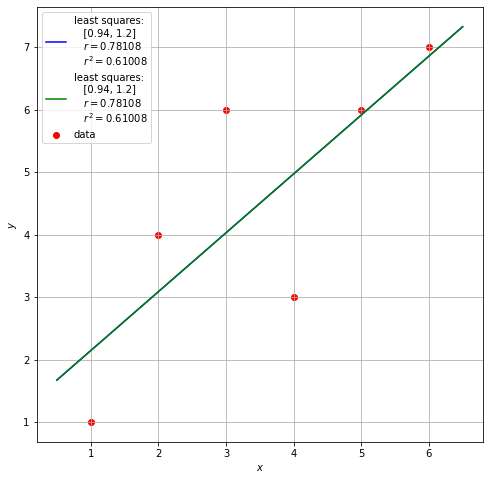

In [16]:
# Sec 4.1 Problem 19
data = pd.read_excel(os.path.join(PATH, 'Prob0401_19.xls'))
x = data['x']
y = data['y']
data1 = data[data['x'] < 30]
x1 = data1['x']
y1 = data1['y']

plt.figure(figsize=(8,8)) 

plt.scatter(x, y, c='r', label='data')

b = np.polyfit(x, y, 1)
s = (x.max() - x.min()) * 0.1
tx = np.array([x.min() - s, x.max() + s])
ty = np.polyval(b, tx)
r = stats.pearsonr(x, y)[0]
label = f'least squares:\n   {[np.round(e, 2) for e in b]}' + \
        f'\n   $r = {r:.5f}$\n   $r^2 = {r**2:.5f}$'
plt.plot(tx, ty, c='b', label=label)

b1 = np.polyfit(x1, y1, 1)
s = (x1.max() - x1.min()) * 0.1
tx1 = np.array([x1.min() - s, x1.max() + s])
ty1 = np.polyval(b1, tx1)
r1 = stats.pearsonr(x1, y1)[0]
label = f'least squares:\n   {[np.round(e, 2) for e in b1]}' + \
        f'\n   $r = {r1:.5f}$\n   $r^2 = {r1**2:.5f}$'
plt.plot(tx1, ty1, c='g', label=label)

# b2 = np.polyfit(x, y, 2)
# tx2 = np.linspace(x.min() - s, x.max() + s)
# ty2 = np.polyval(b2, tx2)
# label = f'least squares:\n   {[np.round(e, 5) for e in b2]}'
# plt.plot(tx2, ty2, c='g', label=label)

# plt.title(f'Ex 1')
plt.xlabel('$x$')
plt.ylabel('$y$')
plt.legend()
plt.grid()
plt.show()

In [17]:
x, y

(0    1
 1    2
 2    3
 3    4
 4    5
 5    6
 Name: x, dtype: int64,
 0    1
 1    4
 2    6
 3    3
 4    6
 5    7
 Name: y, dtype: int64)

In [18]:
x1,y1

(0    1
 1    2
 2    3
 3    4
 4    5
 5    6
 Name: x, dtype: int64,
 0    1
 1    4
 2    6
 3    3
 4    6
 5    7
 Name: y, dtype: int64)

## Data

In [19]:
files = os.listdir(PATH)
files.sort()

for fn in files:
    print(fn)

for fn in files:
    if fn.endswith('.xls') or fn.endswith('.xlsx'):
        df = pd.read_excel(os.path.join(PATH, fn))
        print(f'\nfn: {fn}\nshape: {df.shape}')
        display(df.head())
    elif fn.endswith('.csv'):
        df = pd.read_csv(os.path.join(PATH, fn))
        print(f'\nfn: {fn}\nshape: {df.shape}')
        display(df.head())
    else:
        print(f'\nfn: {fn}')


App00401.xls
Ex0401.xls
GEx0403.xls
Prob0401_13.xls
Prob0401_14.xls
Prob0401_15.xls
Prob0401_16.xls
Prob0401_17.xls
Prob0401_18.xls
Prob0401_19.xls
Prob0401_20a.xls
Prob0401_20b.xls
Prob0401_23a.xls
Prob0401_23b.xls
Prob0402_07.xls
Prob0402_08.xls
Prob0402_09.xls
Prob0402_10.xls
Prob0402_11.xls
Prob0402_12.xls
Prob0402_13.xls
Prob0402_14.xls
Prob0402_15.xls
Prob0402_16.xls
Prob0402_17.xls
Prob0402_18.xls
Prob0402_19.xls
Prob0402_21a.xls
Prob0402_21b.xls
Prob402_022.xlsx
Prob402_022_b.xlsx
Prob402_023.xlsx
Prob402_024.xlsx
Prob402_025.xlsx
RProb0409.xls
RProb0410.xls
RProb0411.xls
RProb0412.xls
RProb0414.xls
Rprob0413.xlsx
Table0401.xls
Table0402.xls
Table0403.xls
Table0404.xls
Table0405.xls
Table0406.xls
Table0407.xls
Table0408.xls
Table0409.xls

fn: App00401.xls
shape: (9, 2)


,x,y
0,0.170,0.63
1,0.190,0.70
2,0.220,0.82
3,0.235,0.88
4,0.235,1.15



fn: Ex0401.xls
shape: (8, 2)


,x,y
0,5.2,3.3
1,7.3,5.9
2,6.7,4.8
3,5.9,4.5
4,6.1,4.0



fn: GEx0403.xls
shape: (10, 2)


,x,y
0,10,5
1,15,2
2,16,1
3,1,9
4,4,7



fn: Prob0401_13.xls
shape: (5, 2)


,x,y
0,3,60
1,6,95
2,12,140
3,18,170
4,24,185



fn: Prob0401_14.xls
shape: (5, 2)


,x,y
0,3,40
1,7,35
2,15,30
3,35,25
4,75,18



fn: Prob0401_15.xls
shape: (6, 2)


,x,y
0,1004,40
1,975,100
2,992,65
3,935,145
4,985,80



fn: Prob0401_16.xls
shape: (7, 2)


,x,y
0,2.9,5.0
1,4.2,10.0
2,3.3,11.2
3,4.5,10.0
4,2.6,7.9



fn: Prob0401_17.xls
shape: (7, 2)


,x,y
0,0.243,1.4
1,0.259,3.6
2,0.286,5.5
3,0.263,3.8
4,0.268,3.5



fn: Prob0401_18.xls
shape: (8, 2)


,x,y
0,12.5,26
1,30.0,73
2,24.5,39
3,14.3,23
4,7.5,15



fn: Prob0401_19.xls
shape: (6, 2)


,x,y
0,1,1
1,2,4
2,3,6
3,4,3
4,5,6



fn: Prob0401_20a.xls
shape: (3, 2)


,x,y
0,1,2
1,3,1
2,4,6



fn: Prob0401_20b.xls
shape: (3, 2)


,x,y
0,2,1
1,1,3
2,6,4



fn: Prob0401_23a.xls
shape: (8, 2)


,x(hr),y(gal)
0,28,48
1,5,3
2,20,34
3,35,55
4,20,34



fn: Prob0401_23b.xls
shape: (8, 2)


,x(hr),y(gal)
0,20,60
1,4,8
2,18,12
3,42,50
4,15,21



fn: Prob0402_07.xls
shape: (6, 2)


,x,y
0,16,2
1,33,3
2,50,6
3,28,5
4,50,9



fn: Prob0402_08.xls
shape: (6, 2)


,x,y
0,1,42
1,3,50
2,10,75
3,16,100
4,26,150



fn: Prob0402_09.xls
shape: (8, 2)


,x,y
0,27,30
1,44,19
2,32,24
3,47,13
4,23,29



fn: Prob0402_10.xls
shape: (4, 2)


,x,y
0,0,50
1,2,45
2,5,33
3,6,26



fn: Prob0402_11.xls
shape: (7, 2)


,x,y
0,17,36
1,27,25
2,37,20
3,47,12
4,57,10



fn: Prob0402_12.xls
shape: (6, 2)


,x,y
0,37,5
1,47,8
2,57,10
3,67,16
4,77,30



fn: Prob0402_13.xls
shape: (6, 2)


,x,y
0,8.6,9.6
1,9.3,18.5
2,10.1,20.9
3,8.0,10.2
4,8.3,11.4



fn: Prob0402_14.xls
shape: (7, 2)


,x,y
0,6.1,-1.4
1,5.7,-4.1
2,3.9,-7.0
3,5.2,-4.0
4,6.2,3.6



fn: Prob0402_15.xls
shape: (6, 2)


,x,y
0,24.2,13.0
1,19.0,4.4
2,18.2,9.3
3,14.9,1.3
4,19.0,0.8



fn: Prob0402_16.xls
shape: (6, 2)


,x,y
0,10,1.8
1,12,1.7
2,14,1.5
3,16,1.4
4,18,1.0



fn: Prob0402_17.xls
shape: (5, 2)


,x,y
0,5.25,19
1,5.75,13
2,6.25,33
3,6.75,37
4,7.25,62



fn: Prob0402_18.xls
shape: (15, 2)


,x,y
0,20.0,88.6
1,16.0,71.6
2,19.8,93.3
3,18.4,84.3
4,17.1,80.6



fn: Prob0402_19.xls
shape: (10, 2)


,x,y
0,6,15
1,20,31
2,0,10
3,14,16
4,25,28



fn: Prob0402_21a.xls
shape: (3, 2)


,x,y
0,1,2
1,3,1
2,4,6



fn: Prob0402_21b.xls
shape: (3, 2)


,x,y
0,2,1
1,1,3
2,6,4



fn: Prob402_022.xlsx
shape: (4, 2)


,1,3
0,2,12
1,3,22
2,4,55
3,5,145



fn: Prob402_022_b.xlsx
shape: (4, 2)


,1.000,0.477
0,2,1.079
1,3,1.342
2,4,1.748
3,5,2.161



fn: Prob402_023.xlsx
shape: (4, 2)


,2,2.1
0,3,3
1,5,12
2,8,125
3,10,630



fn: Prob402_024.xlsx
shape: (4, 2)


,2.00,1.81
0,4,2.90
1,6,3.20
2,8,3.68
3,10,4.11



fn: Prob402_025.xlsx
shape: (4, 2)


,4.0,3.4
0,5,4.2
1,6,6.3
2,8,10.9
3,10,13.3



fn: RProb0409.xls
shape: (5, 2)


,x,y
0,1,14.0
1,2,18.9
2,3,14.4
3,4,19.6
4,5,20.0



fn: RProb0410.xls
shape: (5, 2)


,x,y
0,1,14.0
1,2,18.9
2,3,14.4
3,4,19.6
4,5,20.0



fn: RProb0411.xls
shape: (14, 2)


,x,y
0,21,125
1,25,125
2,23,120
3,24,125
4,20,130



fn: RProb0412.xls
shape: (15, 2)


,x,y
0,11,3
1,19,11
2,16,8
3,13,5
4,28,8



fn: RProb0414.xls
shape: (6, 2)


,x,y
0,29,173
1,2,35
2,11,132
3,17,127
4,7,69



fn: Rprob0413.xlsx
shape: (7, 2)


,11,6
0,20,10
1,16,9
2,6,5
3,12,8
4,18,14



fn: Table0401.xls
shape: (7, 3)


,Division,x,y
0,1,10.0,80
1,2,19.5,65
2,3,30.0,68
3,4,45.0,55
4,5,50.0,35



fn: Table0402.xls
shape: (7, 2)


,x,y
0,70,3
1,115,45
2,105,21
3,82,7
4,93,16



fn: Table0403.xls
shape: (7, 2)


,x,y
0,70,3
1,115,45
2,105,21
3,82,7
4,93,16



fn: Table0404.xls
shape: (10, 2)


,x,y
0,10,5
1,15,2
2,16,1
3,1,9
4,4,7



fn: Table0405.xls
shape: (4, 2)


,x,y
0,6,8
1,18,1
2,12,5
3,14,3



fn: Table0406.xls
shape: (28, 3)


,n,a05,a01
0,3,1.00,1.00
1,4,0.95,0.99
2,5,0.88,0.96
3,6,0.81,0.92
4,7,0.75,0.87



fn: Table0407.xls
shape: (7, 2)


,x,y
0,30,66
1,34,79
2,27,70
3,25,60
4,17,48



fn: Table0408.xls
shape: (10, 2)


,x,y
0,6,15
1,20,31
2,0,10
3,14,16
4,25,28



fn: Table0409.xls
shape: (10, 2)


,x,y
0,6,15
1,20,31
2,0,10
3,14,16
4,25,28


In [20]:
# Sec 3.1 Problem 5
data = [8, 2, 7, 2, 6]
print(f'mean: {np.mean(data)}')
print(f'median: {np.median(data)}')
m = mode(data)


mean: 5.0
median: 6.0


,counts
values,
2,2
6,1
7,1
8,1


mode: 2


In [21]:
# Sec 3.1 Problem 14a
n_0_A = 5
avg_0_A = 10
sum_0_A = n_0_A * avg_0_A

sum_A = sum_0_A + 20
n_A = n_0_A + 1
avg_A = sum_A / n_A

avg_A

11.666666666666666

In [22]:
# Sec 3.1 Problem 14b
n_0_B = 50
avg_0_B = 10
sum_0_B = n_0_B * avg_0_B

sum_B = sum_0_B + 20
n_B = n_0_B + 1
avg_B = sum_B / n_B

avg_B

10.196078431372548

In [23]:
# Sec 3.1 Problem 16
print('(a)')
data = np.array([2,2,3,6,10])
m = mode(data)
print(f'median: {np.median(data)}')
print(f'mean: {np.mean(data)}')

print('\n(b)')
data += 5
m = mode(data)
print(f'median: {np.median(data)}')
print(f'mean: {np.mean(data)}')


(a)


,counts
values,
2,2
3,1
6,1
10,1


mode: 2
median: 3.0
mean: 4.6

(b)


,counts
values,
7,2
8,1
11,1
15,1


mode: 7
median: 8.0
mean: 9.6


In [24]:
# Sec 3.1 Problem 17
print('(a)')
data = np.array([2,2,3,6,10])
m = mode(data)
print(f'median: {np.median(data)}')
print(f'mean: {np.mean(data)}')

print('\n(b)')
data *= 5
m = mode(data)
print(f'median: {np.median(data)}')
print(f'mean: {np.mean(data)}')


(a)


,counts
values,
2,2
3,1
6,1
10,1


mode: 2
median: 3.0
mean: 4.6

(b)


,counts
values,
10,2
15,1
30,1
50,1


mode: 10
median: 15.0
mean: 23.0


In [25]:
# Sec 3.1 Problem 19
data = pd.read_excel(os.path.join(PATH, 'Prob0301_19.xls'))
print(f'mean: {np.mean(data)}')
print(f'median: {np.median(data)}')
m = mode(data)


FileNotFoundError: [Errno 2] No such file or directory: '/home/mark/Documents/Class/Understanding Basic Statistics/Data/Chapter 4/Prob0301_19.xls'

In [ ]:
# Sec 3.1 Problem 20
data = pd.read_excel(os.path.join(PATH, 'Prob0301_20.xls'))['Population_(wolves)']
print(f'mean: {np.mean(data)}')
print(f'median: {np.median(data)}')
m = mode(data)
dotplot(data)

In [ ]:
# Sec 3.1 Problem 22
data = pd.read_excel(os.path.join(PATH, 'Prob0301_22.xls'))['age_(years)']
print(f'mean: {np.mean(data)}')
print(f'median: {np.median(data)}')
m = mode(data)
dotplot(data)

In [ ]:
# Sec 3.1 Problem 23
data = pd.read_excel(os.path.join(PATH, 'Prob0301_23.xls'))['cost_(per day)']
dotplot(data.round(-1))
print(f'mean: {np.mean(data)}')
print(f'median: {np.median(data)}')
m = mode(data)
print(f'trimmed mean: {stats.trim_mean(data, 0.05):.3f}')


In [ ]:
# Sec 3.1 Problem 24
vals = [10,20,30]
wts = [5,3,2]

print(f'weighted avg: {np.average(vals, weights=wts)}')

In [ ]:
# Sec 3.1 Problem 25
vals = [10,20,30]
wts = [2,3,5]

print(f'weighted avg: {np.average(vals, weights=wts)}')

In [ ]:
# Sec 3.1 Problem 26
vals = [92,81,93,85]
wts = [.25,.225,.225,.3]

print(f'weighted avg: {np.average(vals, weights=wts)}')

In [ ]:
# Sec 3.1 Problem 27
vals = [9,7,6,10]
wts = [2,3,1,4]

print(f'weighted avg: {np.average(vals, weights=wts)}')

In [ ]:
# Sec 3.1 Problem 29
# Harmonic Mean - rates of change
2 / ((1/60) + (1/75))

d = [100, 100]
v = [60, 75]
a = sum(d) / ((d[0]/v[0]) + (d[1]/v[1]))

d = [50, 100]
v = [60, 75]
b = sum(d) / ((d[0]/v[0]) + (d[1]/v[1]))

c = stats.hmean([60, 75])  # only defined for non-negative reals

for e in [a,b,c]:
    print(f'{e:.3f}')

In [ ]:
# Sec 3.1 Problem 30
# Geometric Mean - ratios and rates of change
data = np.array([10,12,14.8,3.8,6])
data /= 100
data += 1
print(data)

a = data.prod()**(1/data.size)
print(a)

b = stats.gmean(data)
print(b)


## Section 3.2 _Measures of Variation_

---

### Sum of Squares

$$ \Sigma(x - \bar x)^2 = \Sigma x^2 - \frac{(\Sigma x)^2}{n}$$

Defining formula equals computation formula.

---

### Sample Variance

$$s^2 = \frac{\Sigma (x - \bar x)^2}{n-1}$$

`np.var(data, ddof=1)`

---

### Sample Standard Deviation

$$s = \sqrt{\frac{\Sigma (x - \bar x)^2}{n-1}}$$

`np.std(data, ddof=1)`

---

### Population Variance

$$ \sigma^2 = \frac{\Sigma (x - \mu)^2}{N}$$

`np.var(data, ddof=0)`

---

### Population Standard Deviation

$$ \sigma = \sqrt{\frac{\Sigma (x - \mu)^2}{N}} $$

`np.std(data, ddof=0)`

---

### Coefficient of variation (CV)

$$ CV = \frac{s}{\bar x} \cdot 100 \% $$

$$ CV = \frac{\sigma}{\mu} \cdot 100 \% $$

---

### Chebyshev's Theorem

For _any_ set of data, the proportion of the data that must lie within $k$ standard deviations on either side of the mean is _at least_ $$1 − \frac{1}{k^2}$$ where $k > 1$.

---



In [ ]:
# Ex 6
data = np.array([2,3,3,8,10,10])

print(f'mean: {data.mean()}')

print(f'sample var: {data.var(ddof=1)}')

print(f'sample st dev: {data.std(ddof=1)}')

dotplot(data)

In [ ]:
# Guided Ex 3
data = np.array([5,5,5,6,7,8])

print(f'mean: {data.mean()}')

print(f'sample var: {data.var(ddof=1)}')

print(f'sample st dev: {data.std(ddof=1)}')

dotplot(data)

In [ ]:
# Ex 7
data = np.array([2.1,1.95,2.6,2,1.85,2.25,2.15,2.25])
print(f'range: {data.max()-data.min()}')
print(f'mu: {data.mean()}')
print(f'sigma: {data.std()}')
print(f'CV: {data.std()/data.mean()}')
dotplot(data)

In [ ]:
# Guided Ex 4
data = np.array([1.69,1.49,3.09,1.79,1.39,2.89,1.49,1.39,1.49,1.99])
print(f'range: {data.max()-data.min()}')
print(f'mu: {data.mean()}')
print(f'sigma: {data.std()}')
print(f'CV: {data.std()/data.mean()}')
dotplot(data)

In [ ]:
x = np.linspace(1,10)
y = chebyshev(x)
plt.plot(x,y)
plt.grid()
for x in range(2, 6):
    y = chebyshev(x)
    plt.axhline(y, color = 'r', linestyle = '-')
plt.show()

In [ ]:
# Ex 8
k = 2
m = 29.1
s = 1.7

print(f'{m - k * s:.3f}, {m + k * s:.3f}')

In [ ]:
# Guided EX 5
p = .889
m = 525
s = 30
k, i = chebyshev_int(p, m, s)


### Section 3.2 Problems

In [ ]:
# Sec 3.2 Problem 5
data = np.array(range(2,7))
print(f'range: {data.max()-data.min()}')
print(f'mu: {data.mean()}')
print(f's: {data.std(ddof=1)}')
print(f'sigma: {data.std()}')
dotplot(data)

In [ ]:
# Sec 3.2 Problem 6
data = np.array(range(1,6))
print(f'range: {data.max()-data.min()}')
print(f'mu: {data.mean()}')
print(f's: {data.std(ddof=1)}')
print(f'sigma: {data.std()}')
dotplot(data)

In [ ]:
# Sec 3.2 Problem 9
datas = [[8,9,10,11,12],[7,9,10,11,13],[7,8,10,12,13]]
for d in datas:
    data = np.array(d)
    print(f'data: {data}')
    print(f'range: {data.max()-data.min()}')
    print(f'mu: {data.mean()}')
    print(f's: {data.std(ddof=1)}')
    print(f'sigma: {data.std()}')
    dotplot(data)

In [ ]:
# Sec 3.2 Problem 10
data = np.array([5,9,10,11,15])
for _ in range(2):
    print(f'data: {data}')
    print(f'range: {data.max()-data.min()}')
    print(f'mu: {data.mean()}')
    print(f's: {data.std(ddof=1)}')
    print(f'sigma: {data.std()}')
    dotplot(data)
    data += 5

In [ ]:
# Sec 3.2 Problem 11
data = np.array([5,9,10,11,15])
for _ in range(2):
    print(f'data: {data}')
    print(f'range: {data.max()-data.min()}')
    print(f'mu: {data.mean()}')
    print(f's: {data.std(ddof=1)}')
    print(f'sigma: {data.std()}')
    dotplot(data)
    data *= 5

In [ ]:
# Sec 3.2 Problem 12
# (x - mu) / stdev
print((80 - 70) / 5)
print((80 - 70) / 3)


In [ ]:
# Sec 3.2 Problem 13
data = pd.read_excel(os.path.join(PATH, 'Prob0302_13.xls'))['x:']
print(f'range: {data.max() - data.min()}')
print(f'x_bar: {data.mean()}')
print(f's2: {data.var(ddof=1)}')
print(f's: {data.std(ddof=1)}')
print(f'sigma2: {data.var(ddof=0)}')
print(f'sigma: {data.std(ddof=0)}')
dotplot(data)
data.sum(), (data ** 2).sum()

In [ ]:
# Sec 3.2 Problem 14
x_bar = 15
s = 3
cv = s / x_bar
print(f'CV: {cv:.1%}')
p = .75
k, i = chebyshev_int(p, x_bar, s)


In [ ]:
# Sec 3.2 Problem 15
mu = 20
sigma = 2
cv = sigma / mu
print(f'CV: {cv:.1%}')
p = .889
k, i = chebyshev_int(p, mu, sigma)


In [ ]:
# Sec 3.2 Problem 16
data_x = pd.read_excel(os.path.join(PATH, 'Prob0302_16.xls'))['x:']
data_y = pd.read_excel(os.path.join(PATH, 'Prob0302_16.xls'))['y:']
p = .75
for data in [data_x, data_y]:
    m = data.mean()
    print(f'x_bar: {m}')
    print(f's2: {data.var(ddof=1)}')
    s = data.std(ddof=1)
    print(f's: {s}')
    chebyshev_int(p, m, s)
    cv = s / m
    print(f'CV: {cv:.1%}')
    dotplot(data)


In [ ]:
# Sec 3.2 Problem 17
data = pd.read_excel(os.path.join(PATH, 'Prob0302_17.xls'))['time_(hours)']
print(f'range: {data.max() - data.min()}')
m = data.mean()
print(f'x_bar: {m}')
print(f's2: {data.var(ddof=1)}')
s = data.std(ddof=1)
print(f's: {s}')
cv = s / m
print(f'CV: {cv:.1%}')
dotplot(data.round(1))
data.sum(), (data ** 2).sum()

In [ ]:
# Sec 3.2 Problem 18
data_x = pd.read_excel(os.path.join(PATH, 'Prob0302_18.xls'))['x']
data_y = pd.read_excel(os.path.join(PATH, 'Prob0302_18.xls'))['y']
p = .75
for data in [data_x, data_y]:
    m = data.mean()
    print(f'x_bar: {m:.3f}')
    print(f's2: {data.var(ddof=1):.3f}')
    s = data.std(ddof=1)
    print(f's: {s:.3f}')
    chebyshev_int(p, m, s)
    cv = s / m
    print(f'CV: {cv:.1%}')
    dotplot(data.round())


In [ ]:
# Sec 3.2 Problem 19
data_x = pd.read_excel(os.path.join(PATH, 'Prob0302_19.xls'))['x']
data_y = pd.read_excel(os.path.join(PATH, 'Prob0302_19.xls'))['y']
# p = .75
for data in [data_x, data_y]:
    display(data.to_numpy())
    m = data.mean()
    print(f'x_bar: {m:.3f}')
    print(f's2: {data.var(ddof=1):.3f}')
    s = data.std(ddof=1)
    print(f's: {s:.3f}')
#     chebyshev_int(p, m, s)
    cv = s / m
    print(f'CV: {cv:.1%}')
    dotplot(data.round())


In [ ]:
# Sec 3.2 Problem 20
datas = [[9.58,14.05],[9.02,12.50]]
for m, s in datas:
    cv = s / m
    print(f'\nCV: {cv:.1%}')
    p = 0.75
    chebyshev_int(p, m, s)
    

In [ ]:
# Sec 3.2 Problem 20
m = 2.2
cv = 0.015
s = cv * m
print(f's: {s}')

In [ ]:
# Sec 3.2 Problem 22
# Grouped Data
freq = pd.read_excel(os.path.join(PATH, 'Prob0302_22.xls'))['individuals']
midpts = np.array([5.5, 15.5, 25.5, 35.5])

c = []
for i in range(freq.size):
    c.extend([midpts[i]] * freq[i])
data = np.array(c)

m = data.mean()
print(f'x_bar: {m:.3f}')
print(f's2: {data.var(ddof=1):.3f}')
s = data.std(ddof=1)
print(f's: {s:.3f}')


In [ ]:
# Sec 3.2 Problem 26
# Moving Averages
data = pd.read_excel(os.path.join(PATH, 'Prob0302_26a.xls'))
data['ma_3'] = data['%_Return'].rolling(window=3).mean()

m = data['%_Return'].mean()
print(f'x_bar: {m:.3f}')
v = data['%_Return'].var(ddof=1)
print(f's2: {v:.3f}')
s = data['%_Return'].std(ddof=1)
print(f's: {s:.3f}')

m_ma = data['ma_3'].mean()
print(f'x_bar, ma: {m_ma:.3f}')
s_ma = data['ma_3'].std(ddof=1)
print(f's, ma: {s_ma:.3f}')

data

In [ ]:
# Sec 3.2 Problem 28
# Stratified Sampling w/ preliminary sample standard deviation
m = 100
N = np.array((310, 420, 516))
s = np.array((3, 12, 6))
Ns = N * s
n = (m * Ns / Ns.sum()).round()
print(f'n: {n}')
print(f'n, total: {n.sum()}')
x_bar = np.array((82, 115, 90))
mu = (n * x_bar / m).sum()
print(f'mu: {mu:.3f}')

In [ ]:
# Sec 3.2 Problem 29
# Stratified Sampling w/ preliminary sample standard deviation
m = 250
N = np.array([1525, 917, 2890])
s = np.array([2.2, 1.4, 3.3])
Ns = N * s
n = (m * Ns / Ns.sum()).round()
print(f'n: {n}')
print(f'n, total: {n.sum()}')
x_bar = np.array([6.2, 3.1, 8.5])
mu = (n * x_bar / m).sum()
print(f'mu: {mu:.3f}')

In [ ]:
# Sec 3.2 Problem 30
# Stratified Sampling w/ proportional (representative) sampling
m = 150
N = np.array([183, 371, 255])
n = (m * N / N.sum()).round()
print(f'n: {n}')
print(f'n, total: {n.sum()}')
x_bar = np.array([96, 85, 88])
mu = (n * x_bar / m).sum()
print(f'mu: {mu:.3f}')

## Section 3.3 Percentiles and Box-and-Whisker Plots

---

### Percentile

For whole numbers, $P$ (where $1 \le P \le 99$ ), the $Pth$ __percentile__ of a distribution is a value such that the $P\%$ of the data fall at or below it and $(100 - P)\%$ of the data fall at or above it.

`np.percentile(data, q)` 
> where:
>> __q : array_like of float__ in the range \[0, 100\].

---

### Quartile

`np.quantile(data, q)` where __q : array_like of float__ in the range \[0, 1\].

---

### Interquartile range (IQR)

The difference between the third ansd first quartile.

---

### Five-number summary

Lowest value, $Q_1$, median, $Q_3$, highest value

---


In [ ]:
# Sec 3.3 Ex 9
d = '''
    1.29 1.37 1.30 0.80 0.67 1.33 1.37 1.37 
    1.27 0.93 0.63 0.80 1.27 1.38 0.77 1.14 
    1.53 0.55 0.80 0.70 0.63 0.65 0.47 0.68 
    0.50 0.48 0.46
'''

data = np.array(list(map(float, d.split())))
data.sort()
q = [0.25, 0.50, 0.75]
np.quantile(data, q)

In [ ]:
print(data[:6])
print(data[6])
print(data[7:13])
print(data[13])
print(data[14:20])
print(data[20])
print(data[21:])


In [ ]:
interp = ['linear', 'lower', 'higher', 'midpoint', 'nearest']
for i in interp:
    p = np.percentile(data, [25,50,75], interpolation=i)
    s = '  '.join([f'{n:.3f}' for n in p])
    print(f'{i:9}  {s}')

In [ ]:
interp = ['linear', 'lower', 'higher', 'midpoint', 'nearest']
for i in interp:
    p = np.quantile(data, [.25,.50,.75], interpolation=i)
    s = '  '.join([f'{n:.3f}' for n in p])
    print(f'{i:9}  {s}')

In [ ]:
# Sec 3.3 Guided Ex 7
df = pd.read_excel(os.path.join(PATH, 'Table0306.xls'))
data = df['Calories'].to_numpy()
data.sort()
display(data)
q = [0.25, 0.50, 0.75]
q1, q2, q3 = np.quantile(data, q)
print(f'Q_1: {q1}, Q_2: {q2}, Q_3: {q3}')
iqr = interquartile(data)
print(f'IQR: {iqr}')
np.median(data)

In [ ]:
interp = ['linear', 'lower', 'higher', 'midpoint', 'nearest']
for i in interp:
    p = np.quantile(data, [.25,.50,.75], interpolation=i)
    s = '  '.join([f'{n:.3f}' for n in p])
    print(f'{i:9}  {s}')

In [ ]:
interquartile(data)

In [ ]:
five_num(data)

In [ ]:
quartiles(data)

In [ ]:
# Sec 3.3 Ex 10
fig, ax = plt.subplots(1, 1, figsize=(8, 8))

ax.boxplot(data, showcaps=True)
ax.set_title('Box-and-Whisker Plot')
ax.grid(axis='y')
# ax.set_yticks(five_num(data))
ax.set_ylabel('Calories')
ax.set_xticklabels(labels=['Vanilla-Flavored Ice Cream Bars'])
plt.show()

### Section 3.3 Problems

In [ ]:
# Sec 3.3 Problem 5
df = pd.read_excel(os.path.join(PATH, 'Prob0303_05.xls'))
data = df[2].to_numpy()
data.sort()
display(data)
mi, q1, q2, q3, ma = five_num(data)
print(f'Low: {mi}, Q_1: {q1}, median: {q2}, Q_3: {q3}, High: {ma}')
iqr = interquartile(data)
print(f'IQR: {iqr}')

fig, ax = plt.subplots(1, 1, figsize=(6, 6))

ax.boxplot(data, showcaps=True)
ax.set_title('Problem 5')
ax.grid(axis='y')
ax.set_ylabel('')
ax.set_xticklabels(labels=[''])
plt.show()

In [ ]:
# Sec 3.3 Problem 6
data = np.array([2, 5,  5,  6,  7,  8,  8,  9, 10, 12])
data.sort()
display(data)
mi, q1, q2, q3, ma = five_num(data)
print(f'Low: {mi}, Q_1: {q1}, median: {q2}, Q_3: {q3}, High: {ma}')
iqr = interquartile(data)
print(f'IQR: {iqr}')

fig, ax = plt.subplots(1, 1, figsize=(6, 6))
ax.boxplot(data, showcaps=True)
ax.set_title('Problem 6')
ax.grid(axis='y')
ax.set_ylabel('')
ax.set_xticklabels(labels=[''])
plt.show()

In [ ]:
# Sec 3.3 Problem 7/8
all_data = []
labels = []
for fn, title in [('Prob0303_07.xls', 'Nurses'), ('Prob0303_08.xls', 'Clerical Staff')]:
    df = pd.read_excel(os.path.join(PATH, fn))
#     display(df.head())
    data = df['length_of_service_(mo)'].to_numpy()
    data.sort()
#     display(data)
    mi, q1, q2, q3, ma = five_num(data)
    print(f'Low: {mi}, Q_1: {q1}, median: {q2}, Q_3: {q3}, High: {ma}')
    iqr = interquartile(data)
    print(f'IQR: {iqr}')
    dotplot(data)
    all_data.append(data)
    labels.append(title)

dotplot(data[data < 50])
    
fig, ax = plt.subplots(1, 1, figsize=(6, 6))

ax.set_title('Problem 7/8')

ax.boxplot(all_data, showcaps=True, labels=labels)
ax.grid(axis='y')
ax.set_ylabel('Length of service (months)')

plt.show()

In [ ]:
# Sec 3.3 Problem 9
df = pd.read_excel(os.path.join(PATH, 'Prob0303_09.xls'))
display(df.head())
data = df['Percent BA'].to_numpy()
data.sort()
display(data)
mi, q1, q2, q3, ma = five_num(data)
print(f'Low: {mi}, Q_1: {q1}, median: {q2}, Q_3: {q3}, High: {ma}')
iqr = interquartile(data)
print(f'IQR: {iqr}')

fig, ax = plt.subplots(1, 1, figsize=(6, 6))

ax.boxplot(data, showcaps=True, whis=(0,100))
ax.set_title('Problem 9')
ax.grid(axis='y')
ax.set_ylabel('')
ax.set_xticklabels(labels=[''])
plt.show()

In [ ]:
# Sec 3.3 Problem 10
df = pd.read_excel(os.path.join(PATH, 'Prob0303_10.xls'))
display(df.head())
data = df['percent_dropout'].to_numpy()
data.sort()
display(data)
mi, q1, q2, q3, ma = five_num(data)
print(f'Low: {mi}, Q_1: {q1}, median: {q2}, Q_3: {q3}, High: {ma}')
iqr = interquartile(data)
print(f'IQR: {iqr}')

fig, ax = plt.subplots(1, 1, figsize=(6, 6))

ax.boxplot(data, showcaps=True, whis=(0,100))
ax.set_title('')
ax.grid(axis='y')
ax.set_ylabel('')
ax.set_xticklabels(labels=[''])
plt.show()

In [ ]:
# Sec 3.3 Problem 12
df = pd.read_excel(os.path.join(PATH, 'Prob0303_12.xls'))
display(df.head())
data = df['height_(in)'].to_numpy()
data.sort()
display(data)
mi, q1, q2, q3, ma = five_num(data)
print(f'Low: {mi}, Q_1: {q1}, median: {q2}, Q_3: {q3}, High: {ma}')
iqr = interquartile(data)
print(f'IQR: {iqr}')

fig, ax = plt.subplots(1, 1, figsize=(6, 6))

ax.boxplot(data, showcaps=True)
ax.set_title('')
ax.grid(axis='y')
ax.set_ylabel('')
ax.set_xticklabels(labels=[''])
plt.show()

## Chapter 3 Review Problems

In [ ]:
# Chpt 3 Rev Problem 10
a = np.array([4,4,4,4,5,5,5,6,6,7,7,7,7,7,8,8,9,9,9,10,10,10,10])
b = np.array([4,4,5,5,5,6,6,6,6,7,7,7,7,7,8,8,8,8,9,9,9,10,10])
print(f'size: {a.size}, {b.size}')

s_a = a.std(ddof=1)
print(f's_a: {s_a:.3f}')

s_b = b.std(ddof=1)
print(f's_b: {s_b:.3f}')

print(f'five sum, a: {five_num(a)}')
print(f'five sum, b: {five_num(b)}')

m_a = a.mean()
print('\n',((np.unique(a)-m_a)/s_a).round(2))
print("\nstd's, a")
for d in range(-2, 3):
    print(f'{d:3}   {m_a + d * s_a:.3f}')

m_b = b.mean()
print('\n',((np.unique(b)-m_b)/s_b).round(2))
print("\nstd's, b")
for d in range(-2, 3):
    print(f'{d:3}   {m_b + d * s_b:.3f}')

In [ ]:
# Chpt 3 Rev Problem 12
df = pd.read_excel(os.path.join(PATH, 'RProb0312 (2).xls'))
# display(df.head())

data = df['radon_(Pci/L)'].to_numpy()
data.sort()
display(data)

# (a)
d = all_stats(data)
print(f"mean: {d['mean']:.3f}")
print(f"median: {d['median']:.3f}")
print(f"mode: {d['mode']:.3f}")

# (b)
print(f"s: {d['s']:.3f}")
print(f"CV: {d['cv']:.3f}")
print(f"range: {d['range']:.3f}")

fig, ax = plt.subplots(1, 1, figsize=(6, 6))
ax.boxplot(data, showcaps=True)
ax.set_title('')
ax.grid(axis='y')
ax.set_ylabel('radon_(Pci/L)')
ax.set_xticklabels(labels=[''])
plt.show()

In [ ]:
# Chpt 3 Rev Problem 13
df = pd.read_excel(os.path.join(PATH, 'RProb0313.xls'))
display(df.head())

data = df['Percentage_Democrats'].to_numpy()
data.sort()
display(data)

d = all_stats(data)
print(f"mean: {d['mean']:.3f}")
print(f"s: {d['s']:.3f}")
print(d['five_num'])
print(f"IQR: {d['iqr']:.3f}")

fig, ax = plt.subplots(1, 1, figsize=(6, 6))
ax.boxplot(data, showcaps=True)
ax.set_title('')
ax.grid(axis='y')
ax.set_ylabel('')
ax.set_xticklabels(labels=[''])
plt.show()

cheb = chebyshev_int(.75, d['mean'], d['s'], show=True)

In [ ]:
# Chpt 3 Rev Problem 14
wts = np.array([5,8,8,15,15,15,34])
grades = np.array([92,73,81,85,87,83,90])

avg = np.average(grades, weights=wts)
print(f'(a) average: {avg:.3f}')

grades = np.array([20,73,81,85,87,83,90])
avg = np.average(grades, weights=wts)
print(f'(b) average: {avg:.3f}')


In [ ]:
# Chpt 3 Rev Problem 15
2500 / 16

In [ ]:
# Chpt 3 Rev Problem 16
df = pd.read_excel(os.path.join(PATH, 'RProb0316.xls'))
# display(df.head())
data = df['weight_(kg)'].to_numpy()
data.sort()
# display(data)

# (a)
d = all_stats(data)
print(d['five_num'])
# (b)
print(f"IQR: {d['iqr']:.3f}")
# (c)
fig, ax = plt.subplots(1, 1, figsize=(6, 6))

ax.boxplot(data, showcaps=True)
ax.set_title('')
ax.grid(axis='y')
ax.set_ylabel('')
ax.set_xticklabels(labels=[''])
plt.show()


In [ ]:
# Chpt 3 Rev Problem 17
data = np.array(
    [25.9, 32.4, 33.1, 19.1, 17.5, 
     24.9, 27.1, 29.1, 25.6, 31.8,
     21.0, 45.1, 30.8, 34.3, 25.9,
     18.6, 23.7, 24.1, 23.9]
)
data.sort()
display(data)

# (b)
d = all_stats(data)
print(f"mean: {d['mean']:.3f}")
print(f"median: {d['median']:.3f}")
print(f"mode: {d['mode']:.3f}")

# (c)
print(f"range: {d['range']:.3f}")
print(f"s: {d['s']:.3f}")

# (d)
cheb = chebyshev_int(.75, d['mean'], d['s'], show=True)

# (e)
print(d['five_num'])
print(f"IQR: {d['iqr']:.3f}")
print(f"CV: {d['cv']:.3f}")

fig, ax = plt.subplots(1, 1, figsize=(6, 6))
ax.boxplot(data, showcaps=True)
ax.set_title('')
ax.grid(axis='y')
ax.set_ylabel('')
ax.set_xticklabels(labels=[''])
plt.show()

# (f)
data2 = np.array([3.83, 3.81, 4.01, 4.84, 5.81, 
                  5.50, 4.31, 5.81, 4.31, 4.67])
data2.sort()
display(data2)
d = all_stats(data2)
print(f"mean: {d['mean']:.3f}")
print(f"CV: {d['cv']:.3f}")

fig, ax = plt.subplots(1, 2, figsize=(12, 6))
ax[0].boxplot(data2, showcaps=True)
ax[0].set_title('')
ax[0].grid(axis='y')
ax[0].set_ylabel('')
ax[0].set_xticklabels(labels=['Madison'])
ax[1].boxplot([data, data2], showcaps=True)
ax[1].set_title('')
ax[1].grid(axis='y')
ax[1].set_ylabel('')
ax[1].set_xticklabels(labels=['Yellowstone', 'Madison'])
plt.show()


In [ ]:
# Chpt 3 Rev Problem 18
df = pd.read_excel(os.path.join(PATH, 'RProb03_18.xls'))
data = df['water_content'].to_numpy()
data.sort()

d = all_stats(data)
print(f"IQR: {d['iqr']:.3f}")
print(f"mean: {d['mean']:.3f}")
print(f"s: {d['s']:.3f}")

fig, ax = plt.subplots(1, 1, figsize=(6, 6))
ax.boxplot(data, showcaps=True)
ax.set_title('')
ax.grid(axis='y')
ax.set_ylabel('')
ax.set_xticklabels(labels=[''])
plt.show()

dotplot(data)

In [ ]:
# Chpt 3 Rev Problem 19
wts = np.array([2,3,3,5,3])
scores = np.array([5,8,7,9,7])
np.average(scores, weights=wts)

In [ ]:
# Linking Concepts 3
m = np.array([.72,6.42])
s = np.array([.12,1.07])
s / m

In [ ]:
# Application 1
df = pd.read_excel(os.path.join(PATH, 'App0301.xls'))
# display(df.head())
data = df['air_movement_(mph)'].to_numpy()
display(data)
dotplot(data)

# (a)
d = all_stats(data)
print(f"mean: {d['mean']:.3f}")
print(f"median: {d['median']:.3f}")
print(f"mode: {d['mode']:.3f}")
print(f"range: {d['range']:.3f}")
print(f"var: {d['s2']:.3f}")
print(f"s: {d['s']:.3f}")

# (b)
print(d['five_num'])

fig, ax = plt.subplots(1, 1, figsize=(6, 6))
ax.boxplot(data, showcaps=True)
ax.set_title('')
ax.grid(axis='y')
ax.set_ylabel('')
ax.set_xticklabels(labels=[''])
plt.show()

# (c)
data = data[data < 50]
display(data)
dotplot(data)

# (c-a)
d = all_stats(data)
print(f"mean: {d['mean']:.3f}")
print(f"median: {d['median']:.3f}")
print(f"mode: {d['mode']:.3f}")
print(f"range: {d['range']:.3f}")
print(f"var: {d['s2']:.3f}")
print(f"s: {d['s']:.3f}")

# (c-b)
print(d['five_num'])

fig, ax = plt.subplots(1, 1, figsize=(6, 6))
ax.boxplot(data, showcaps=True)
ax.set_title('')
ax.grid(axis='y')
ax.set_ylabel('')
ax.set_xticklabels(labels=[''])
plt.show()



In [ ]:
# Cum Rev Applications
df = pd.read_excel(os.path.join(PATH, 'CRev0305.xls'))
# display(df.head())
data = df['pH'].to_numpy()
# display(data)
dotplot(data)

x = []
y = []
unique, counts = np.unique(data, return_counts=True)
cnt = {}
for v, n in zip(unique, counts):
    cnt[v] = n
    for i in range(1, n + 1):
        x.append(v)
        y.append(i)

h = 2
fig, ax0 = plt.subplots(1, 1, figsize=(15, h))

ax0.scatter(x, y, c='k')
ax0.set_title(title)
ax0.grid(axis='x', color='0.85')
ax0.set_ylim((0, 6 * h))
ax0.set_xticks([7 + i * .2 for i in range(10)])

plt.show()

# (5)
np.random.shuffle(data)
n = 10
display(data[:10])

# (7)
stem_leave((data*10).astype(int), split=True)

# (8)
bins = 10
freq, edges = np.histogram(data, bins=bins)
rel_freq = freq / data.size
print(freq)
print(edges)
fig, ax = plt.subplots(1, 2, figsize=(15, 4))
ax[0].hist(edges[:-1], edges, weights=freq)
ax[0].set_ylabel(r'Frequency, $f$')
ax[0].grid(axis='both', color='0.85')
ax[0].set_xticks(edges)
ax[1].hist(edges[:-1], edges, weights=rel_freq)
ax[1].set_ylabel(r'Relative frequency, $f/n$')
ax[1].grid(axis='x', color='0.85')
ax[1].set_xticks(edges)
plt.show()

bins = 9
freq, edges = np.histogram(data, bins=bins)
rel_freq = freq / data.size
print(freq)
print(edges)
fig, ax = plt.subplots(1, 2, figsize=(15, 4))
ax[0].hist(edges[:-1], edges, weights=freq)
ax[0].set_ylabel(r'Frequency, $f$')
ax[0].grid(axis='both', color='0.85')
ax[0].set_xticks(edges)
ax[1].hist(edges[:-1], edges, weights=rel_freq)
ax[1].set_ylabel(r'Relative frequency, $f/n$')
ax[1].grid(axis='x', color='0.85')
ax[1].set_xticks(edges)
plt.show()

# (9)
bins = 5
freq, edges = np.histogram(data, bins=bins)
cumulative = np.cumsum(np.hstack(([0],freq)))
fig, ax0 = plt.subplots(1, 1, figsize=(6, 4))
ax0.plot(edges, cumulative, 'ro-')
ax0.set_ylabel(r'Cumulative frequency, $\Sigma f$')
ax0.grid(axis='both', color='0.85')
ax0.set_xticks(edges)
plt.show()

# (10)
d = all_stats(data)
print(f"range: {d['range']:.3f}")
print(f"mean: {d['mean']:.3f}")
print(f"median: {d['median']:.3f}")
print(f"mode: {d['mode']:.3f}")
# (11a)
print(f'sum of x: {data.sum():.1f}, sum of x squared: {(data**2).sum()}:.1f')
# (11b)
print(f"var: {d['s2']:.3f}")
print(f"s: {d['s']:.3f}")
print(f"CV: {d['cv']:.3f}")
# (12)
cheb = chebyshev_int(.75, d['mean'], d['s'], show=True)
# (13)
print(f"IQR: {d['iqr']:.3f}")
fig, ax = plt.subplots(1, 1, figsize=(6, 6))
ax.boxplot(data, showcaps=True)
ax.set_title('')
ax.grid(axis='y')
ax.set_ylabel('')
ax.set_xticklabels(labels=[''])
plt.show()
